In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import skimage
%matplotlib inline
import gym

In [2]:
env = gym.make('MsPacman-v0')

[2017-08-10 21:50:58,134] Making new env: MsPacman-v0


In [3]:
env.action_space.n

9

In [4]:
env.env.get_action_meanings()

['NOOP',
 'UP',
 'RIGHT',
 'LEFT',
 'DOWN',
 'UPRIGHT',
 'UPLEFT',
 'DOWNRIGHT',
 'DOWNLEFT']

The network will have 9 outputs corresponding to the nine different actions that the agent can perform. These represent the eight different planes of movement of the atari joystick and when the joystick is not moved in any direction

In [5]:
rew_list = []
for epis in range(10):
    sum_reward = 0
    observation = env.reset()
    for _ in range(1000):
        env.render()
        observation, reward, done, info = env.step(env.action_space.sample())
        sum_reward += reward
    rew_list.append(sum_reward)
print(sum(rew_list) / len(rew_list))

159.0


In [6]:
print(env.observation_space)

Box(210, 160, 3)


In [7]:
print(env.observation_space.high)
print("-"*120)
print(env.observation_space.low)

[[[ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  ..., 
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]]

 [[ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  ..., 
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]]

 [[ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  ..., 
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]]

 ..., 
 [[ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  ..., 
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]]

 [[ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  ..., 
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]]

 [[ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  ..., 
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]]]
------------------------------------------------------------------------------------------------------------------------
[[[ 0.  0.  0.]
  [ 

It can be seen that the input is a 3 dimensional array. The first two dimensions refer to the height and the width of the pixels in the simulated game. The third dimension represents the RGB values of each individual pixel

In [8]:
observation = env.reset()

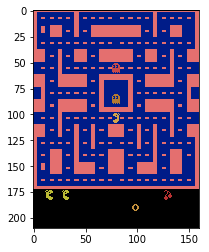

In [9]:
plt.imshow(observation)

In [10]:
observation.shape

(210, 160, 3)

In [11]:
def RGBtoGRYSCL(img):
    return np.dot(img[...,:3], [0.299, 0.587, 0.114])

In [12]:
observation = env.reset()
Grey_obsv = RGBtoGRYSCL(observation)

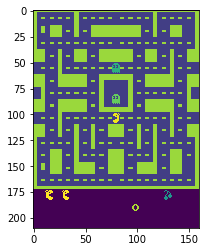

In [13]:
plt.imshow(Grey_obsv)

In [14]:
Grey_obsv.shape

(210, 160)

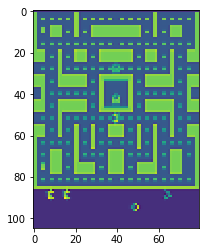

In [15]:
plt.imshow(scipy.ndimage.zoom(Grey_obsv, 0.5))

In [16]:
scipy.ndimage.zoom(Grey_obsv, 0.5).shape

(105, 80)

In [17]:
skimage.transform.resize(Grey_obsv, [84,84])

AttributeError: module 'skimage' has no attribute 'transform'

In [ ]:
from skimage.color import rgb2gray

In [ ]:
observation = env.reset()
plt.imshow(rgb2gray(observation))


In [ ]:
from skimage.transform import rescale, resize

In [ ]:
resiz_img = resize(observation, (84, 84))

In [ ]:
plt.imshow(resiz_img)